In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df1 = pd.read_csv('E:/gc_data/dataset/onlyvariabe.csv')
df1

,Domain,Topic,Data Source,Variable Name,Variable Label
0,1. Social context,Demographics,ACS,ACS_AVG_HH_SIZE,Average household size
1,2. Economic context,Income,ACS,ACS_GINI_INDEX,Gini index of income inequality
2,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_INC,Median income of grandparent householder and/o...
3,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_NO_PRNT_INC,Median income of grandparent householder and/o...
4,4. Physical infrastructure,Housing,ACS,ACS_MDN_OWNER_COST_MORTGAGE,Median selected monthly owner costs for houses...
...,...,...,...,...,...
1400,6. Geography,NaN,NaN,TRACTFIPS,State-county-census tract FIPS Code (11-digit)
1401,4. Physical infrastructure,Environment,WUSTL,WUSTL_AVG_PM25,Annual mean of Particulate Matter (PM2.5) conc...
1402,Identifier,NaN,NaN,YEAR,SDOH file year
1403,6. Geography,NaN,NaN,ZCTA,"ZIP Code Tabulation Area, 5-digits"


In [9]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # multi-language model


In [13]:
# creating embeddings for Variable Label columns and storing it into numpy array
t =model.encode(df1['Variable Label'], convert_to_tensor=True)

# converting t in torch to numpy array
t = t.cpu().detach().numpy()

In [14]:
t.shape

(1405, 384)

In [15]:
t1 = t.copy()

In [16]:
t1.shape

(1405, 384)

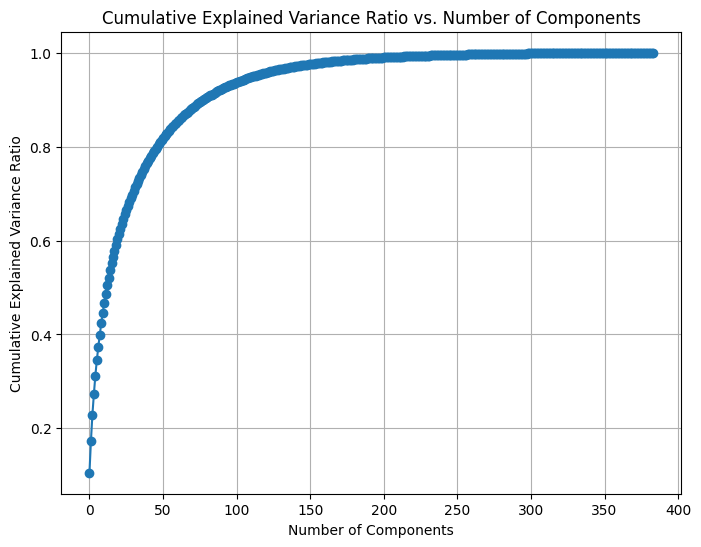

In [17]:
pca = PCA()
t_pca = pca.fit_transform(t1)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

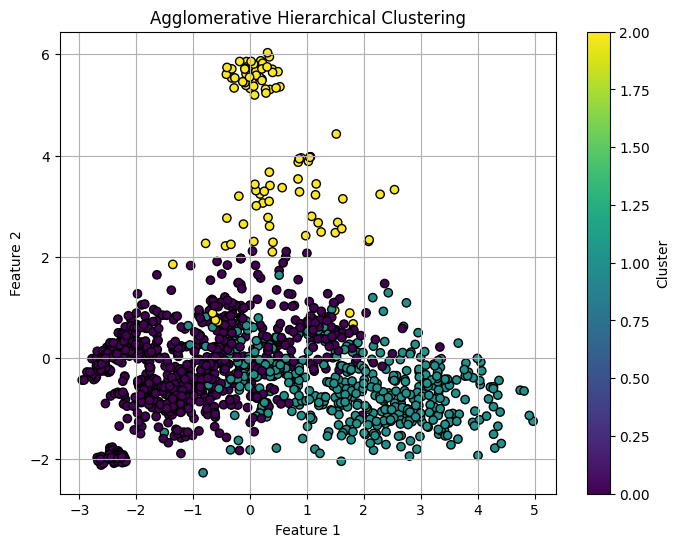

In [28]:
pca = PCA(n_components=2)
X = pca.fit_transform(t1)
# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(t1)
# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis', marker='o', edgecolors='k')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#plt.scatter(X[-1, 0], X[-1, 1], color='red', marker='o', label='Point X[-1]')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [29]:
pca = PCA(n_components=150)
X1 = pca.fit_transform(t1)
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20)
X = tsne.fit_transform(X1)

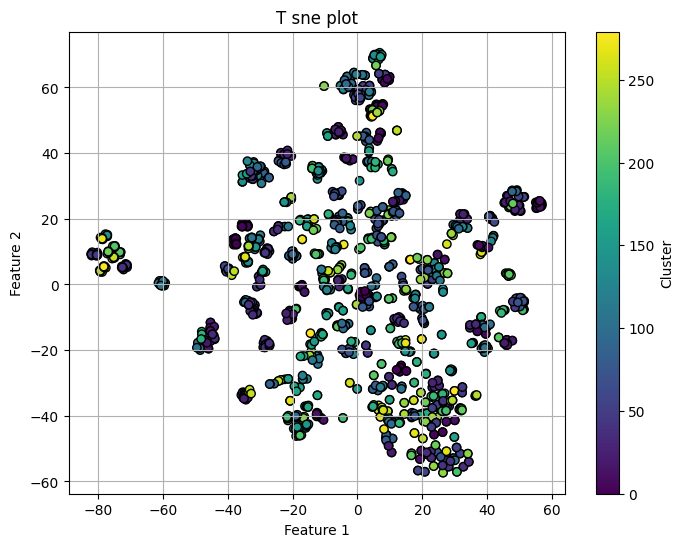

In [30]:
clustering = AgglomerativeClustering(n_clusters=280)
clustering.fit(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1],c=clustering.labels_, marker='o', edgecolors='k')
plt.title('T sne plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [31]:
df1['label'] = clustering.labels_

In [32]:
df1

,Domain,Topic,Data Source,Variable Name,Variable Label,label
0,1. Social context,Demographics,ACS,ACS_AVG_HH_SIZE,Average household size,39
1,2. Economic context,Income,ACS,ACS_GINI_INDEX,Gini index of income inequality,122
2,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_INC,Median income of grandparent householder and/o...,34
3,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_NO_PRNT_INC,Median income of grandparent householder and/o...,34
4,4. Physical infrastructure,Housing,ACS,ACS_MDN_OWNER_COST_MORTGAGE,Median selected monthly owner costs for houses...,18
...,...,...,...,...,...,...
1400,6. Geography,NaN,NaN,TRACTFIPS,State-county-census tract FIPS Code (11-digit),254
1401,4. Physical infrastructure,Environment,WUSTL,WUSTL_AVG_PM25,Annual mean of Particulate Matter (PM2.5) conc...,102
1402,Identifier,NaN,NaN,YEAR,SDOH file year,260
1403,6. Geography,NaN,NaN,ZCTA,"ZIP Code Tabulation Area, 5-digits",86


In [33]:
# df1['label'].value_counts()

In [34]:
pd.set_option('display.max_colwidth', None)
df1[df1['label'] == 23][['Variable Name','Variable Label','label']]

,Variable Name,Variable Label,label
759,CRDC_TOT_STUDENTS,Total number of students in the county,23
762,CRDC_TOT_STUD_ASN_F,Total number of Asian female students in the county,23
763,CRDC_TOT_STUD_ASN_M,Total number of Asian male students in the county,23
764,CRDC_TOT_STUD_BLK_F,Total number of Black female students in the county,23
765,CRDC_TOT_STUD_BLK_M,Total number of Black male students in the county,23
766,CRDC_TOT_STUD_HIS_F,Total number of Hispanic female students in the county,23
767,CRDC_TOT_STUD_HIS_M,Total number of Hispanic male students in the county,23
770,CRDC_TOT_STUD_MTR_F,Total number of two or more races female students in the county,23
771,CRDC_TOT_STUD_MTR_M,Total number of two or more races male students in the county,23
774,CRDC_TOT_STUD_WHT_F,Total number of White female students in the county,23


In [35]:
pd.set_option('display.max_colwidth', 50)

In [36]:
df1[df1['Topic'] == 'Immigration']

,Domain,Topic,Data Source,Variable Name,Variable Label,label
70,1. Social context,Immigration,ACS,ACS_PCT_CTZ_ABOVE18,Percentage of population who are citizens (age...,89
71,1. Social context,Immigration,ACS,ACS_PCT_CTZ_NATURALIZED,Percentage of population consisting of U.S. ci...,127
72,1. Social context,Immigration,ACS,ACS_PCT_CTZ_NONUS_BORN,Percentage of population consisting of U.S. ci...,127
73,1. Social context,Immigration,ACS,ACS_PCT_CTZ_US_BORN,Percentage of population consisting of U.S. ci...,127
88,1. Social context,Immigration,ACS,ACS_PCT_FOREIGN_BORN,Percentage of population that is foreign-born,127
188,1. Social context,Immigration,ACS,ACS_PCT_NONCTN_1990,Percentage of population who are not U.S. citi...,127
189,1. Social context,Immigration,ACS,ACS_PCT_NONCTN_1999,Percentage of population who are not U.S. citi...,127
190,1. Social context,Immigration,ACS,ACS_PCT_NONCTN_2000,Percentage of population who are not U.S. citi...,127
191,1. Social context,Immigration,ACS,ACS_PCT_NONCTN_2010,Percentage of population who are not U.S. citi...,127
194,1. Social context,Immigration,ACS,ACS_PCT_NON_CITIZEN,Percentage of population who are not U.S. citi...,127


In [37]:
for i in range(280):
    print(i)
    for j in df1[df1['label'] == i]['Variable Label']:
        print(j)
    print('\n')

0
Percentage of population with other health insurance coverage combinations
Percentage of population with any private health insurance coverage
Percentage of population with any private health insurance coverage (ages 64 and below)
Percentage of population with employer-based health insurance only (ages 64 and below)
Percentage of population with other private-only health insurance combinations
Percentage of population with other private-only health insurance combinations (ages 64 and below)
Percentage of population with direct-purchase health insurance only
Percentage of population with direct-purchase health insurance only (ages 64 and below)
Percentage of population with other public-only health insurance combinations
Percentage of population with other public-only health insurance combinations (ages 64 and below)
Percentage of population with no health insurance coverage
Percentage of population with no health insurance (ages 64 and below)


1
Probability of reaching the top quint